In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [34]:
#df = pd.read_csv('UpdatedResumeDataSet.csv')
clean_df = pd.read_csv('../data/clean_resume_data.csv')
clean_DataJob = pd.read_csv('../data/jd_structured_data.csv')
clean_df['Category'].value_counts()


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [35]:

clean_DataJob['ID'] = range(len(clean_DataJob))
clean_DataJob.drop(columns=['Industry','Average Salary','Sector','Type of ownership','Location','Founded','Size','Headquarters','Company Name','Rating','Average Revenue','Competitors'], inplace=True)
clean_DataJob = clean_DataJob[['ID', 'Job Title', 'Processed_JD']]
clean_DataJob.columns = ['ID', 'Category', 'Feature']
clean_DataJob['Category'].value_counts()


Category
Data Scientist                                                       178
Data Engineer                                                         68
Senior Data Scientist                                                 42
Data Analyst                                                          18
Senior Data Engineer                                                  17
                                                                    ... 
Jr. Data Scientist                                                     1
Data Architect / Data Modeler                                          1
Data Scientists                                                        1
Associate Scientist / Sr. Associate Scientist, Antibody Discovery      1
Machine Learning Engineer (NLP)                                        1
Name: count, Length: 328, dtype: int64

In [36]:
clean_DataJob.dropna(inplace=True)
filtered_df = clean_DataJob.groupby('Category').filter(lambda x: len(x) >= 22)
filtered_df['Category'].value_counts()


Category
Data Scientist           178
Data Engineer             68
Senior Data Scientist     42
Name: count, dtype: int64

In [37]:
clean_df = pd.concat([clean_df, filtered_df], ignore_index=True)
clean_df.tail(1)


,ID,Category,Feature
2771,954,Data Engineer,Loading... Title: Data Engineer Location: Aust...


In [38]:
clean_df['Category'].value_counts()

Category
Data Scientist            178
BUSINESS-DEVELOPMENT      120
INFORMATION-TECHNOLOGY    120
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
FINANCE                   118
ADVOCATE                  118
FITNESS                   117
AVIATION                  117
SALES                     116
CONSULTANT                115
HEALTHCARE                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
Data Engineer              68
AGRICULTURE                63
Senior Data Scientist      42
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

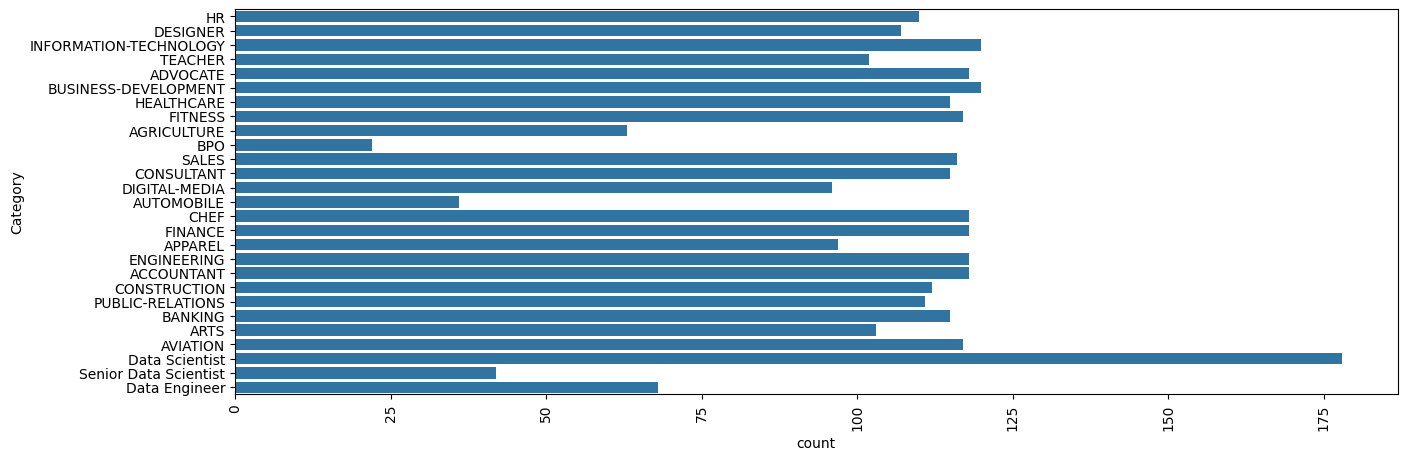

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(clean_df['Category'])
plt.xticks(rotation=90)
plt.show()

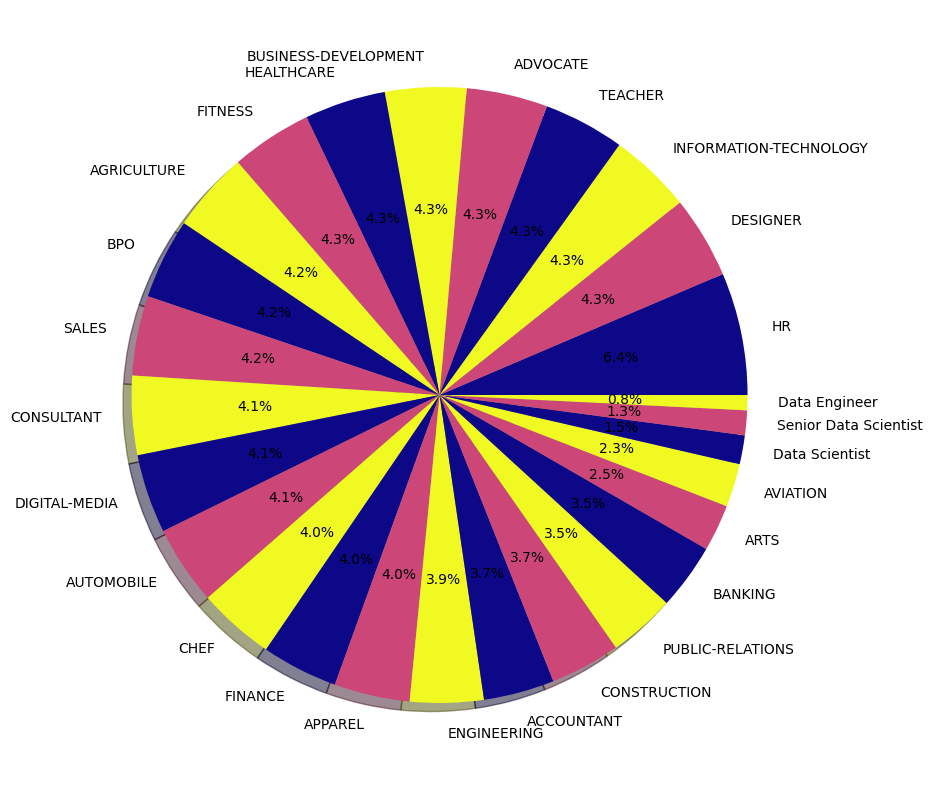

In [40]:
counts = clean_df['Category'].value_counts()
labels = clean_df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [41]:
#balancing data 
from sklearn.utils import resample
# Define the maximum count among all categories
max_count = clean_df['Category'].value_counts().max()
# Resample each category to match the maximum count
balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [42]:
balanced_df['Category'].value_counts()

Category
HR                        178
DESIGNER                  178
INFORMATION-TECHNOLOGY    178
TEACHER                   178
ADVOCATE                  178
BUSINESS-DEVELOPMENT      178
HEALTHCARE                178
FITNESS                   178
AGRICULTURE               178
BPO                       178
SALES                     178
CONSULTANT                178
DIGITAL-MEDIA             178
AUTOMOBILE                178
CHEF                      178
FINANCE                   178
APPAREL                   178
ENGINEERING               178
ACCOUNTANT                178
CONSTRUCTION              178
PUBLIC-RELATIONS          178
BANKING                   178
ARTS                      178
AVIATION                  178
Data Scientist            178
Senior Data Scientist     178
Data Engineer             178
Name: count, dtype: int64

In [43]:
# balanced_df.isnull().sum()
balanced_df.dropna(inplace=True)

In [44]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 290893 stored elements and shape (961, 33608)>

Accuracy: 0.9302809573361083
                        precision    recall  f1-score   support

            ACCOUNTANT       0.89      1.00      0.94        31
              ADVOCATE       0.97      0.95      0.96        40
           AGRICULTURE       1.00      0.94      0.97        36
               APPAREL       0.93      0.93      0.93        27
                  ARTS       0.91      0.81      0.85        36
            AUTOMOBILE       1.00      1.00      1.00        36
              AVIATION       0.88      0.93      0.90        40
               BANKING       0.97      0.88      0.92        33
                   BPO       1.00      1.00      1.00        32
  BUSINESS-DEVELOPMENT       0.80      0.91      0.85        35
                  CHEF       0.97      1.00      0.98        32
          CONSTRUCTION       0.98      0.91      0.94        45
            CONSULTANT       0.91      0.64      0.75        33
              DESIGNER       0.93      0.98      0.95        42
         D

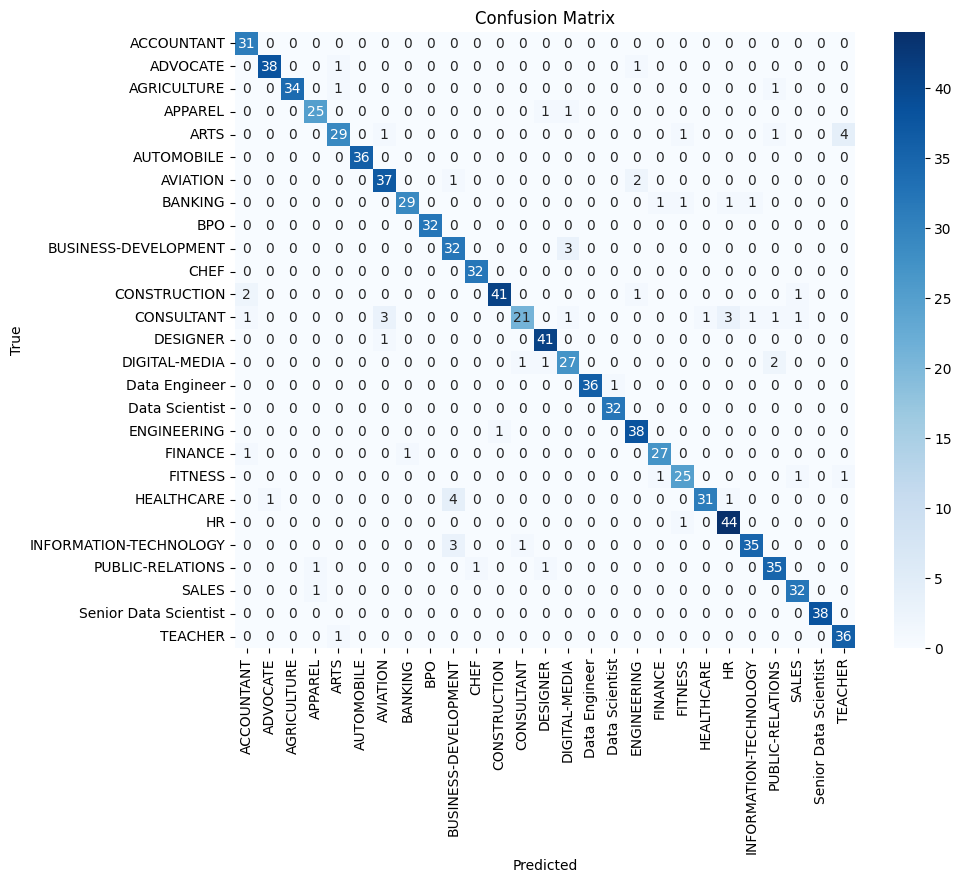

In [46]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
# Step 4: Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Clean resume
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [50]:
# Example Usage
resume_file = """Summary
Hard worker, dedicated, detail-oriented, experienced, organized, and highly motivated. Possessing many attributes, I am an individual with years of experience in data science, machine learning, and statistical analysis. Capable of quickly adapting to new challenges, I am experienced in leveraging data to drive business decisions, building predictive models, and delivering actionable insights.

Highlights

Expertise in machine learning algorithms and statistical modeling.

Proficient in data cleaning, exploration, and visualization.

Experienced in building and deploying predictive models.

Skilled in using Python, R, and SQL for data analysis.

Strong knowledge of data visualization tools like Tableau and Power BI.

Experienced in working with big data technologies such as Hadoop and Spark.

Collaborative team player with excellent communication skills.

Professional Experience

Data Scientist
Company Name – City, State
Employment Dates

Developed and deployed machine learning models to predict customer churn, improving retention rates by 15%.

Conducted exploratory data analysis (EDA) to identify trends and patterns in large datasets.

Built and maintained data pipelines to automate data collection and preprocessing.

Collaborated with cross-functional teams to translate business problems into data-driven solutions.

Created interactive dashboards using Tableau to visualize key performance metrics for stakeholders.

Utilized Python libraries (Pandas, NumPy, Scikit-learn) for data manipulation and model development.

Documented and presented findings to non-technical audiences, ensuring clear communication of insights.

Data Analyst
Company Name – City, State
Employment Dates

Analyzed large datasets to identify trends and provide actionable recommendations.

Developed SQL queries to extract and manipulate data from relational databases.

Created data visualizations using Power BI to support decision-making processes.

Assisted in the development of A/B testing frameworks to evaluate the impact of business initiatives.

Collaborated with data engineers to ensure data quality and integrity.

Automated reporting processes, reducing manual effort by 25%.

Education
Master’s in Data Science
University Name – City, Country
Attendance Dates

Courses: Machine Learning, Statistical Analysis, Big Data, Data Visualization.

Capstone Project: Built a recommendation system for an e-commerce platform using collaborative filtering.

Bachelor’s in Computer Science
University Name – City, Country
Attendance Dates

Specialization: Data Analysis and Programming.

Technical Skills

Languages: Python, R, SQL

Machine Learning: Scikit-learn, TensorFlow, Keras, XGBoost

Data Visualization: Tableau, Power BI, Matplotlib, Seaborn

Big Data: Hadoop, Spark

Databases: MySQL, PostgreSQL, MongoDB

Tools: Git, Jupyter Notebook, Docker

Certifications

Google Professional Data Engineer

Microsoft Certified: Data Scientist Associate

AWS Certified Machine Learning – Specialty

Soft Skills

Strong problem-solving and analytical thinking.

Excellent communication and presentation skills.

Ability to work collaboratively in cross-functional teams.

Adaptable to new tools and technologies.

Detail-oriented and highly organized.

Languages

English (fluent)

French (fluent)"""

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: Data Scientist


In [51]:
import pickle
pickle.dump(rf_classifier,open('../models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('../models/tfidf_vectorizer_categorization.pkl','wb'))